In [3]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('loan_data.csv')

In [5]:
df.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


CONCLUSION :
- There are no null values in the dataset.

1. Descriptive Statistics:
- What are the mean, median, and standard deviations of numeric features such as int.rate , installment , log.annual.inc , dti , fico , days.with.cr.line , revol.bal , and
revol.util ?

In [8]:
# Calculate mean, median, and standard deviation for the specified columns
descriptive_stats = df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
                               'days.with.cr.line', 'revol.bal', 'revol.util']].agg(['mean', 'median', 'std'])

descriptive_stats

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
mean,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,16913.963876,46.799236
median,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8596.000000,46.300000
std,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,33756.189557,29.014417


CONCLUSION :
- Here we can analyze the parameters like mean. median and standard daviation of the above listed columns.
- Observation 1 mean and median value of in.rate is alomst same.
- Observation 2 mean and median value of log.annual.ic is alomst same.
- Means these two columns almost follow normal distribution curve.

2. Distribution Analysis:
- Analyze the distribution of fico scores among borrowers. What does the distribution tell us about the creditworthiness of the majority of the borrowers?

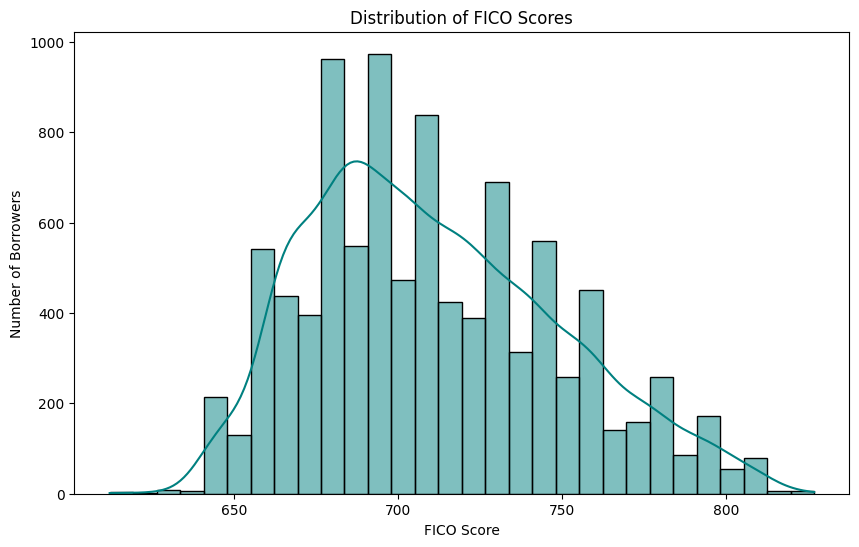

In [18]:
# Plotting the histogram
plt.figure(figsize=(10,6))
sns.histplot(df['fico'], bins=30, color='teal', kde=True, edgecolor='black')
plt.title('Distribution of FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Number of Borrowers')
plt.show()

CONCLUSION :
- A histogram of the fico scores will show the distribution and help identify if the majority of borrowers have high, medium, or low credit scores.
- The fico score for majority lies in the range of 600 to 800.
- The Density Curve Also shows that the distribution is almost Normal which is a good sign.

In [20]:
mean_fico = df['fico'].mean()
median_fico = df['fico'].median()
std_fico = df['fico'].std()

print(f"Mean FICO Score: {mean_fico}")
print(f"Median FICO Score: {median_fico}")
print(f"Standard Deviation of FICO Score: {std_fico}")

Mean FICO Score: 710.8463144706619
Median FICO Score: 707.0
Standard Deviation of FICO Score: 37.97053722671365


3. Correlation Analysis:
- Which variables are strongly correlated to int.rate ? How do these relationships affect the interpretation of the loan terms?

In [22]:
# Calculate the correlation matrix
correlation_matrix = df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']].corr()

In [23]:
# Focus on correlations with 'int.rate'
int_rate_correlation = correlation_matrix['int.rate'].sort_values(ascending=False)

In [24]:
int_rate_correlation

,int.rate
int.rate,1.000000
revol.util,0.464837
installment,0.276140
dti,0.220006
revol.bal,0.092527
log.annual.inc,0.056383
days.with.cr.line,-0.124022
fico,-0.714821


CONCLUSION :
- There is a positive correlation of int.rate with columns revol.util, installment, dti, revol.bal, log.annual.inc.
- The strenght of the positive relation between int.rate and revol.util is strongest with a magnitude of 0.464837.
-  There is a negative correlation of int.rate with columns days.with.cr.line, fico.
- The strenght of the negative relation between int.rate and fico is strongest with a magnitude of -0.714821.

4. Credit Policy Compliance:
- Compare the characteristics of borrowers who meet the credit policy ( credit.policy == 1 ) versus those who do not. What are the key differences?

In [25]:
# DESCRIPTIVE STATISTICS FOR EACH GROUP
# Split the data into two groups based on the credit policy
credit_policy_yes = df[df['credit.policy'] == 1]
credit_policy_no = df[df['credit.policy'] == 0]

In [26]:
# Descriptive statistics for each group
credit_policy_stats_yes = credit_policy_yes[['fico', 'int.rate', 'dti', 'log.annual.inc', 'installment']].describe()
credit_policy_stats_no = credit_policy_no[['fico', 'int.rate', 'dti', 'log.annual.inc', 'installment']].describe()

In [27]:
print("Statistics for Borrowers Meeting Credit Policy:")
credit_policy_stats_yes

Statistics for Borrowers Meeting Credit Policy:


,fico,int.rate,dti,log.annual.inc,installment
count,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000
mean,717.356031,0.118754,12.298684,10.942680,325.079200
std,36.630697,0.025571,6.627485,0.585371,205.611447
min,627.000000,0.060000,0.000000,8.294050,15.690000
25%,687.000000,0.097600,7.130000,10.596535,166.500000
50%,712.000000,0.118900,12.380000,10.933107,278.605000
75%,742.000000,0.135700,17.520000,11.289819,447.747500
max,827.000000,0.212100,29.420000,14.528354,918.020000


In [28]:
print("\nStatistics for Borrowers Not Meeting Credit Policy:")
credit_policy_stats_no


Statistics for Borrowers Not Meeting Credit Policy:


,fico,int.rate,dti,log.annual.inc,installment
count,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
mean,683.978051,0.138680,13.877901,10.888520,294.367115
std,30.950970,0.026032,7.727552,0.722315,211.256726
min,612.000000,0.060000,0.000000,7.547502,15.670000
25%,657.000000,0.122200,7.757500,10.463103,138.867500
50%,682.000000,0.138700,14.085000,10.896739,240.610000
75%,702.000000,0.154500,19.945000,11.314475,392.840000
max,807.000000,0.216400,29.960000,13.458836,940.140000


CONCLUSION :
- Total Borrowers Meeting Credit Policy are 7710, while those who are Not Meeting The Vredit Policy are 1868 in numbers.
- Max Installment for Borrowers Meeting Credit Policy are 918 while those who are Not Meeting The Vredit Policy are 940.
- The main deciding factor deciding for Borrowers Meeting Credit Policy or Not is average fico scores, Above 700 is accepted and below 700 is rejected.

5. Purpose of Loans:
- What is the most common purpose for the loans? How do loan characteristics vary with the purpose?

In [29]:
# Count the number of loans for each purpose
loan_purpose_counts = df['purpose'].value_counts()

In [30]:
print("Most Common Loan Purposes:")
loan_purpose_counts

Most Common Loan Purposes:


,count
purpose,
debt_consolidation,3957
all_other,2331
credit_card,1262
home_improvement,629
small_business,619
major_purchase,437
educational,343


In [32]:
# Descriptive statistics for key features grouped by loan purpose
loan_purpose_stats = df.groupby('purpose')[['int.rate', 'fico', 'installment', 'dti']].describe()

In [34]:
print("\nDescriptive Statistics by Loan Purpose:")
loan_purpose_stats.T


Descriptive Statistics by Loan Purpose:


purpose              all_other  credit_card  debt_consolidation  educational  \
int.rate    count  2331.000000  1262.000000         3957.000000   343.000000   
            mean      0.116771     0.119738            0.126595     0.119907   
            std       0.027152     0.024906            0.024769     0.026551   
            min       0.063900     0.060000            0.060000     0.060000   
            25%       0.093200     0.100800            0.111400     0.097600   
            50%       0.118300     0.118900            0.128000     0.121800   
            75%       0.135500     0.135700            0.142600     0.135700   
            max       0.216400     0.208600            0.212100     0.201100   
fico        count  2331.000000  1262.000000         3957.000000   343.000000   
            mean    715.344058   709.626783          703.871367   708.282799   
            std      40.059548    35.590267           34.397778    38.365188   
            min     632.000000   627.000000          612.000000   612.000000   
            25%     682.000000   682.000000          677.000000   677.000000   
            50%     712.000000   707.000000          697.000000   707.000000   
            75%     742.000000   737.000000          727.000000   737.000000   
            max     822.000000   812.000000          822.000000   807.000000   
installment count  2331.000000  1262.000000         3957.000000   343.000000   
            mean    244.937542   319.500713          358.984390   217.547201   
            std     184.272991   198.228995          198.309002   168.505475   
            min      15.690000    16.730000           23.210000    15.670000   
            25%     111.580000   171.150000          201.520000    99.925000   
            50%     190.630000   266.675000          325.080000   169.620000   
            75%     319.470000   426.110000          491.300000   278.430000   
            max     916.950000   922.420000          940.140000   861.880000   
dti         count  2331.000000  1262.000000         3957.000000   343.000000   
            mean     11.079498    14.099398           14.076462    11.344927   
            std       7.099443     6.474297            6.433460     6.939110   
            min       0.000000     0.000000            0.000000     0.000000   
            25%       5.005000     9.182500            9.200000     5.425000   
            50%      10.560000    14.380000           14.240000    11.420000   
            75%      16.560000    19.220000           19.130000    16.385000   
            max      29.900000    29.950000           29.960000    29.740000   

purpose            home_improvement  major_purchase  small_business  
int.rate    count        629.000000      437.000000      619.000000  
            mean           0.117507        0.114171        0.138087  
            std            0.026889        0.027445        0.031191  
            min            0.060000        0.070500        0.071400  
            25%            0.094500        0.089400        0.114600  
            50%            0.118300        0.115800        0.137900  
            75%            0.134800        0.134800        0.160000  
            max            0.216400        0.201700        0.212100  
fico        count        629.000000      437.000000      619.000000  
            mean         724.806041      722.503432      719.988691  
            std           43.561991       41.098429       37.768905  
            min          632.000000      642.000000      642.000000  
            25%          687.000000      687.000000      692.000000  
            50%          722.000000      722.000000      717.000000  
            75%          757.000000      757.000000      747.000000  
            max          827.000000      817.000000      822.000000  
installment count        629.000000      437.000000      619.000000  
            mean         337.071590      243.483913      433.826607  
            std          222.

CONCLUSION :
- The interest rate significantly influences the overall cost of borrowing, with small business loans being the most expensive and education loans being the most affordable.
- The outstanding balance (fico) provides insights into borrowing habits, with credit cards and debt consolidation loans reflecting higher debt levels compared to other categories.
- The installment amount reflects an individual's ability to repay debt, with debt consolidation and major purchases requiring higher installments.
- The debt-to-income ratio (dti) indicates an individual's financial health, and maintaining a low dti is essential for long-term financial stability.

6. Interest Rate Variations:
- How does the interest rate vary across different loan purposes and FICO scores?

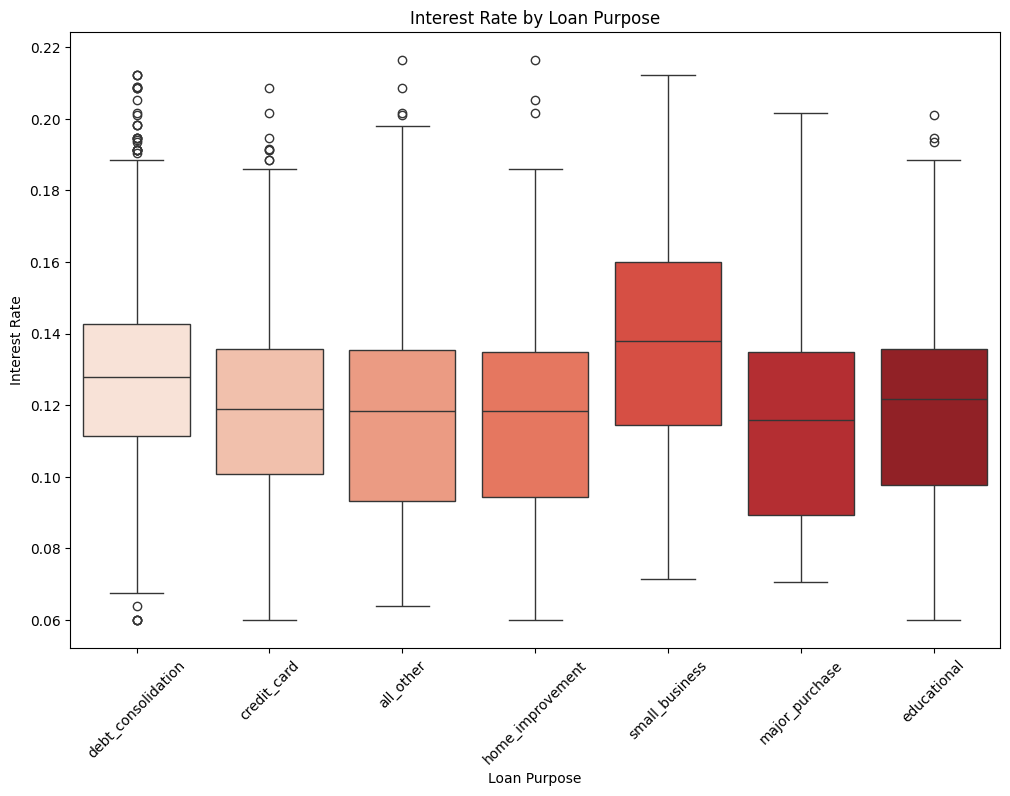

In [39]:
# Visualizing the Interest Rate by Loan Purpose
plt.figure(figsize=(12, 8))
sns.boxplot(x='purpose', y='int.rate', data=df, palette="Reds")
plt.title('Interest Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()

CONCLUSION :
- Interest rates vary widely across loan purposes.
- Education loans are cheapest, small business loans are most expensive.
- There are significant differences in interest rates within each loan type.

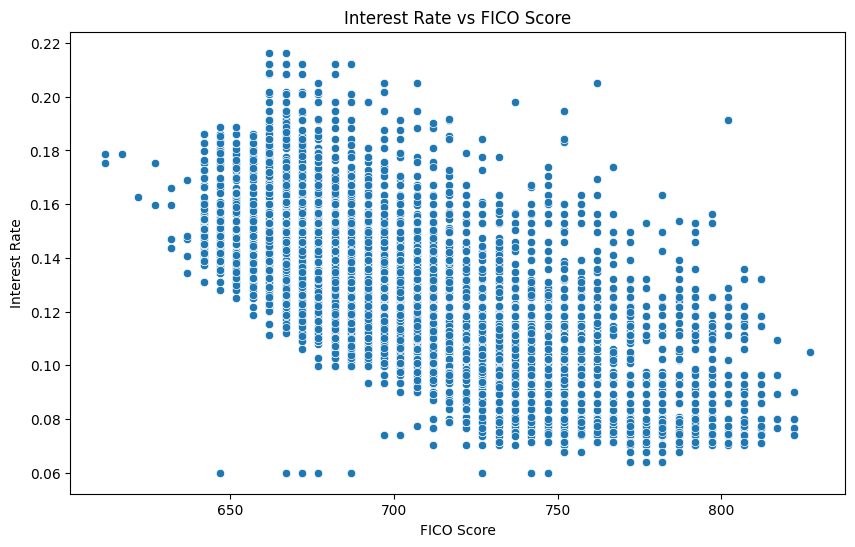

In [41]:
# Scatter plot of Interest Rate vs FICO Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fico', y='int.rate', data=df, palette='BuPu')
plt.title('Interest Rate vs FICO Score')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.show()

CONCLUSION :
- Higher FICO scores generally lead to lower interest rates.
- The relationship between FICO score and interest rate is strong.
- Some exceptions exist where high FICO scores don't guarantee low rates.

7. Income Analysis:
- Explore the relationship between borrowers' income (using log.annual.inc ) and their loan characteristics such as amount, purpose, and interest rate.

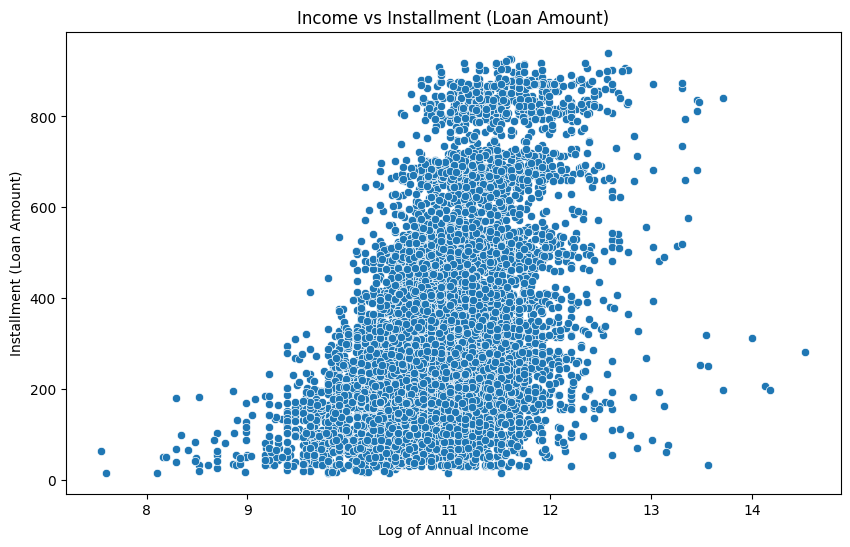

In [42]:
# Scatter plot of Income vs Installment (proxy for Loan Amount)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log.annual.inc', y='installment', data=df, palette='Oranges')
plt.title('Income vs Installment (Loan Amount)')
plt.xlabel('Log of Annual Income')
plt.ylabel('Installment (Loan Amount)')
plt.show()

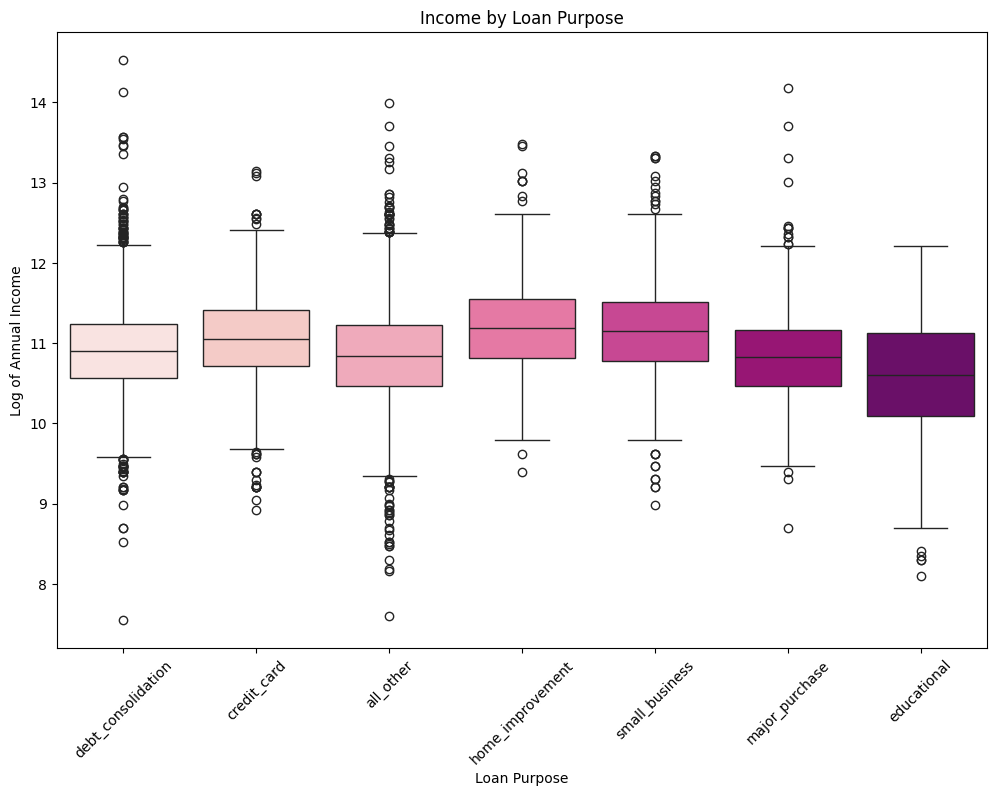

In [43]:
# Box plot of Income by Loan Purpose
plt.figure(figsize=(12, 8))
sns.boxplot(x='purpose', y='log.annual.inc', data=df, palette='RdPu')
plt.title('Income by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Log of Annual Income')
plt.xticks(rotation=45)
plt.show()

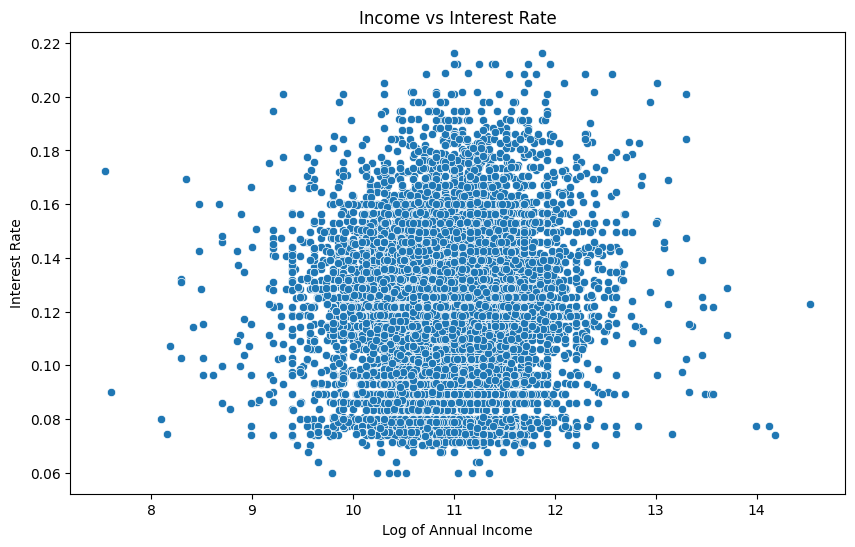

In [44]:
# Scatter plot of Income vs Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log.annual.inc', y='int.rate', data=df, palette='Accent')
plt.title('Income vs Interest Rate')
plt.xlabel('Log of Annual Income')
plt.ylabel('Interest Rate')
plt.show()

CONCLUSION :
- Higher income generally leads to larger loan installments.
- Borrowers with debt consolidation loans tend to have more existing debt.
- Income level seems to have little impact on interest rates offered.

8. Debt to Income Ratio:
- What insights can be derived from analyzing the dti (debt-to-income ratio) across different loan purposes?

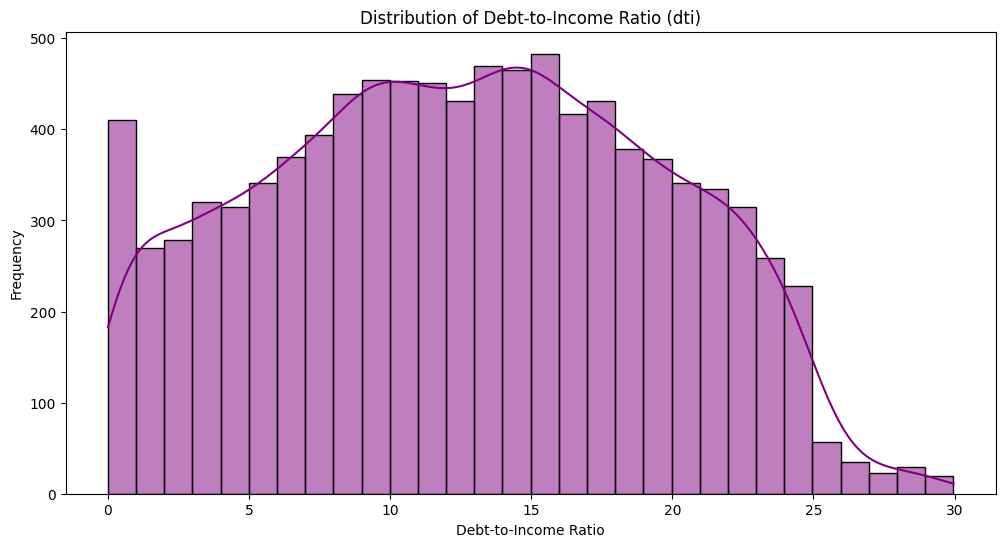

In [45]:
# Distribution of Debt-to-Income Ratio (dti)
plt.figure(figsize=(12, 6))
sns.histplot(df['dti'], kde=True, color='purple')
plt.title('Distribution of Debt-to-Income Ratio (dti)')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

CONCLUSION :
- Most borrowers have a high debt-to-income ratio.

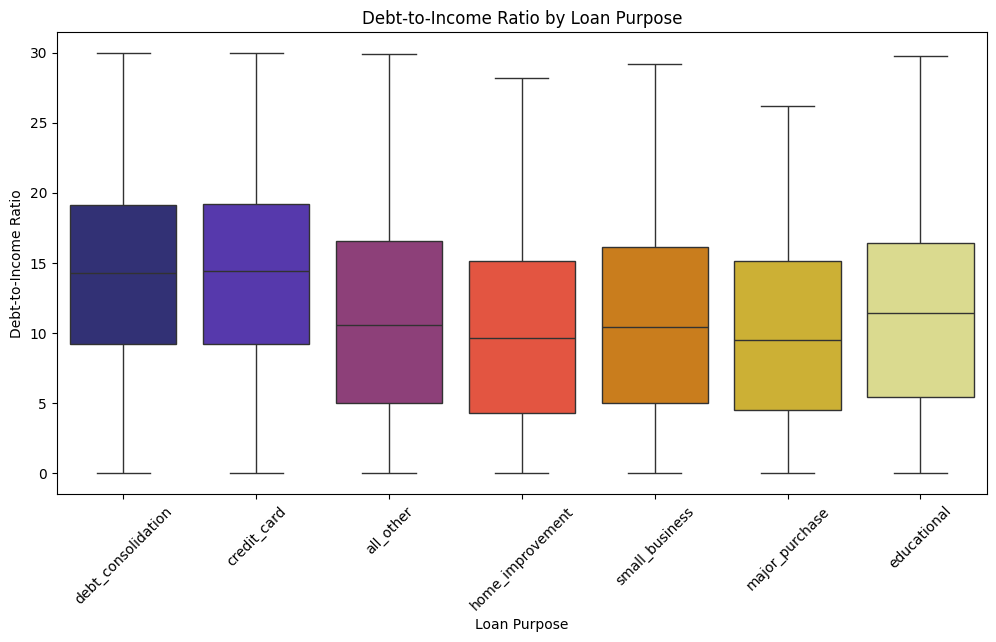

In [46]:
# Box plot of Debt-to-Income Ratio by Loan Purpose
plt.figure(figsize=(12, 6))
sns.boxplot(x='purpose', y='dti', data=df, palette='CMRmap')
plt.title('Debt-to-Income Ratio by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Debt-to-Income Ratio')
plt.xticks(rotation=45)
plt.show()

CONCLUSION :
- Debt consolidation loans have highest debt-to-income ratios.

9. Delinquency Patterns:
- What patterns can be observed in terms of delinquency ( delinq.2yrs ) across different FICO score ranges?

In [47]:
# Define FICO score ranges and categorize borrowers
fico_bins = [300, 500, 600, 700, 800, 850]
fico_labels = ['300-500', '500-600', '600-700', '700-800', '800+']
df['fico_range'] = pd.cut(df['fico'], bins=fico_bins, labels=fico_labels, right=False)

In [48]:
# Calculate average delinquencies within each FICO score range
avg_delinq_by_fico = df.groupby('fico_range')['delinq.2yrs'].mean()

In [49]:
print("Average Delinquencies by FICO Score Range:")
avg_delinq_by_fico

Average Delinquencies by FICO Score Range:


,delinq.2yrs
fico_range,
300-500,NaN
500-600,NaN
600-700,0.285951
700-800,0.069263
800+,0.000000


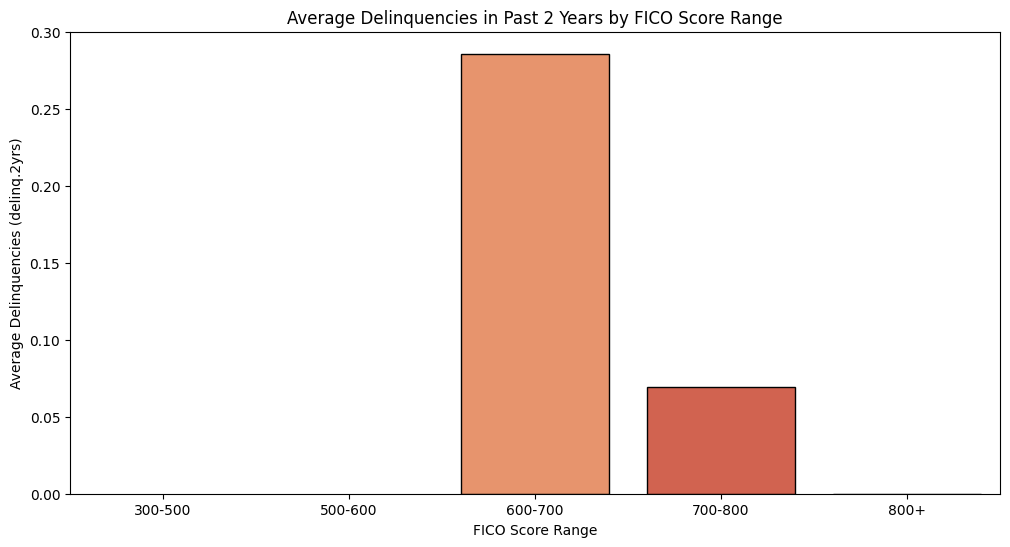

In [50]:
# Visualizing Delinquencies by FICO Score Range
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delinq_by_fico.index, y=avg_delinq_by_fico.values, palette='OrRd', edgecolor='black')
plt.title('Average Delinquencies in Past 2 Years by FICO Score Range')
plt.xlabel('FICO Score Range')
plt.ylabel('Average Delinquencies (delinq.2yrs)')
plt.show()

CONCLUSION :
- Credit score is strongly correlated with delinquency rate.
- Borrowers with lower FICO scores have significantly higher delinquency rates compared to those with higher scores.
- This suggests that creditworthiness is a crucial factor in predicting repayment behavior.

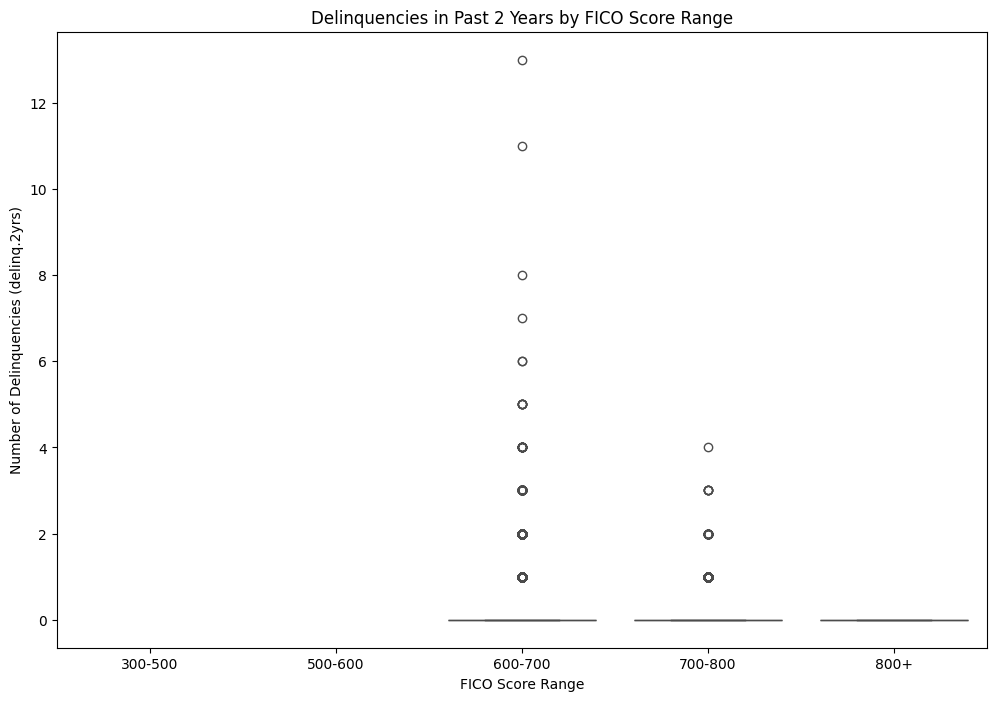

In [52]:
# Box plot to see the distribution of delinquencies within each FICO score range
plt.figure(figsize=(12, 8))
sns.boxplot(x='fico_range', y='delinq.2yrs', data=df, palette='Wistia')
plt.title('Delinquencies in Past 2 Years by FICO Score Range')
plt.xlabel('FICO Score Range')
plt.ylabel('Number of Delinquencies (delinq.2yrs)')
plt.show()

CONCLUSION :
- Individuals with lower FICO scores are significantly more likely to have experienced delinquencies in the past two years compared to those with higher scores.
- The relationship between credit score and delinquency is not linear. There's a sharp increase in delinquencies for the 600-700 range, suggesting a critical threshold.

10. Public Records Analysis:
- How does having derogatory public records ( pub.rec ) impact the loan characteristics such as interest rates and loan amount?

In [53]:
# Impact of Public Records on Interest Rates
avg_int_rate_by_pub_rec = df.groupby('pub.rec')['int.rate'].mean()

In [54]:
print("Average Interest Rate by Public Records:")
avg_int_rate_by_pub_rec

Average Interest Rate by Public Records:


,int.rate
pub.rec,
0,0.121987
1,0.132721
2,0.142363
3,0.139960
4,0.157000
5,0.141800


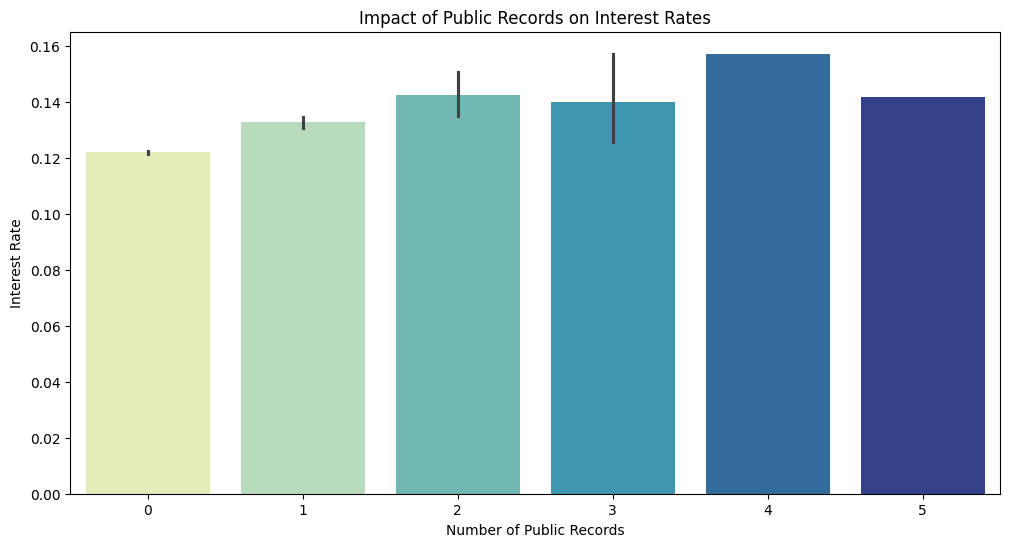

In [55]:
# Visualizing the Impact of Public Records on Interest Rates
plt.figure(figsize=(12, 6))
sns.barplot(x='pub.rec', y='int.rate', data=df, palette='YlGnBu')
plt.title('Impact of Public Records on Interest Rates')
plt.xlabel('Number of Public Records')
plt.ylabel('Interest Rate')
plt.show()

In [56]:
# Impact of Public Records on Loan Amounts (using Installment as a proxy)
avg_installment_by_pub_rec = df.groupby('pub.rec')['installment'].mean()

In [57]:
print("Average Loan Amount (Installment) by Public Records:")
avg_installment_by_pub_rec

Average Loan Amount (Installment) by Public Records:


,installment
pub.rec,
0,320.694233
1,295.861782
2,231.560526
3,233.038000
4,350.110000
5,287.830000


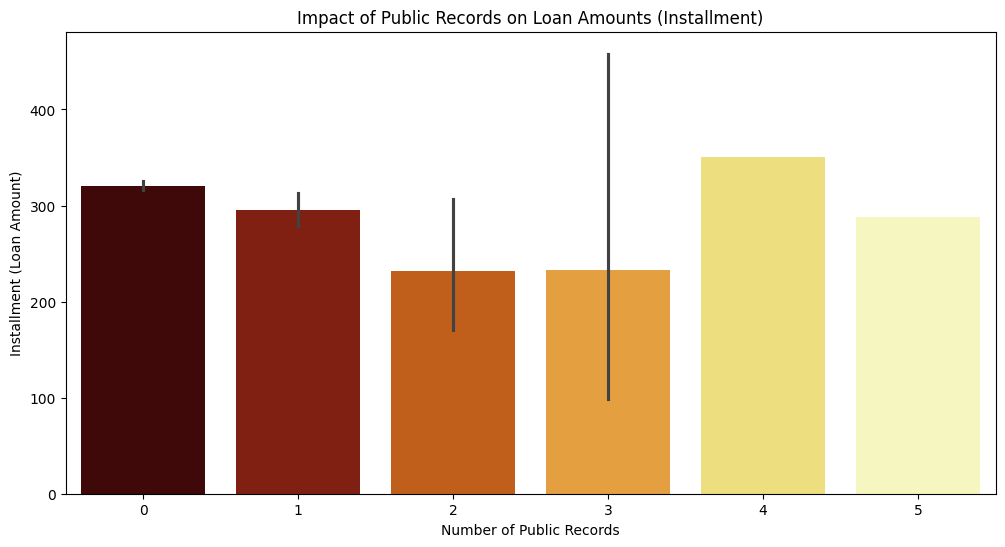

In [58]:
# Visualizing the Impact of Public Records on Loan Amounts
plt.figure(figsize=(12, 6))
sns.barplot(x='pub.rec', y='installment', data=df, palette='afmhot')
plt.title('Impact of Public Records on Loan Amounts (Installment)')
plt.xlabel('Number of Public Records')
plt.ylabel('Installment (Loan Amount)')
plt.show()

CONCLUSION :
- Borrowers with derogatory public records might be charged higher interest rates, reflecting the increased risk they pose to lenders.
- Borrowers with public records might receive smaller loan amounts, indicating that lenders are more conservative when dealing with higher-risk applicants.

In [62]:
print('*'*180)

************************************************************************************************************************************************************************************


# **END OF REPORT**